<div style="background-color:##ff99ff">
  <ul><li><h1> All Imports</h1></li></ul>
</div>

In [160]:
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objs as go
from datetime import datetime

import cufflinks as cf
import cf_matrix
from plotly.offline import iplot, init_notebook_mode, plot
cf.go_offline()

import nltk
from nltk.tokenize import RegexpTokenizer,word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,f1_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV

sns.set()
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
nltk.download("stopwords")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Shubham
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Shubham
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<div style="background-color:##ff99ff">
  <ul><li><h1>PART-1 [DATA EXPLORATION]</h1></li></ul>
</div>

## NOTE : After Each EDA analysis, Inference have been provided

In [2]:
rawTrain_df = pd.read_csv('Edureka_Consumer_Complaints_train.csv')
rawTest_df = pd.read_csv('Edureka_Consumer_Complaints_test.csv')

<div style="background-color:##66ff99">
  <ul><li><h3>Data Information</h3></li></ul>
</div>

In [3]:
print("Memory used by Training Data: {}MB  and Test Data: {}MB".format(round(rawTrain_df.memory_usage().sum()/1024**2,3),round(rawTest_df.memory_usage().sum()/1024**2,3)))

Memory used by Training Data: 49.275MB  and Test Data: 15.513MB


In [4]:
print("Train Data has {} rows and {} columns".format(rawTrain_df.shape[0],rawTrain_df.shape[1]))
print("Test Data has {} rows and {} columns".format(rawTest_df.shape[0],rawTest_df.shape[1]))

Train Data has 358810 rows and 18 columns
Test Data has 119606 rows and 17 columns


In [5]:
rawTrain_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


1. Date Recieved : Date when complaint was received.
2. Product : Type of product identified in the complaint.
3. Sub-product : Type of sub-product identified in the complaint.
4. Issue : The issue raised in the complaint
5. Sub-Issue :
6. Consumer Complaint Narrative : This is a consumer-submitted description of "What happened".
7. Compoany Public response : The response to a consumer's complaint
8. Company : For which the complaint is about
9. State : Derived from the consumer's mailing address
10. Consumer consent provided : Flag to specify whether the consumer allowed the publishing of their complaint description
11. Submitted Via:
12. Date sent to company:
13. Company Response to consumer
14. Timely Response: Flag specifying if the response was timely
15. Consumer Disputed: Flag specifying if the consumer disputed the resolution
16. Complaint ID : Identifer for each complaint.

And we have to predict if the Consumer Disputed or not

<div style="background-color:##66ff99">
  <ul><li><h3>Analyzing the missing values</h3></li></ul>
</div>

In [6]:
df_null = pd.DataFrame(rawTrain_df.isnull().mean() * 100,columns=['Percentage Missing'])

In [7]:
df_null

,Percentage Missing
Date received,0.000000
Product,0.000000
Sub-product,28.925058
Issue,0.000000
Sub-issue,61.139322
Consumer complaint narrative,84.342688
Company public response,81.067696
Company,0.000000
State,0.809063
ZIP code,0.811293


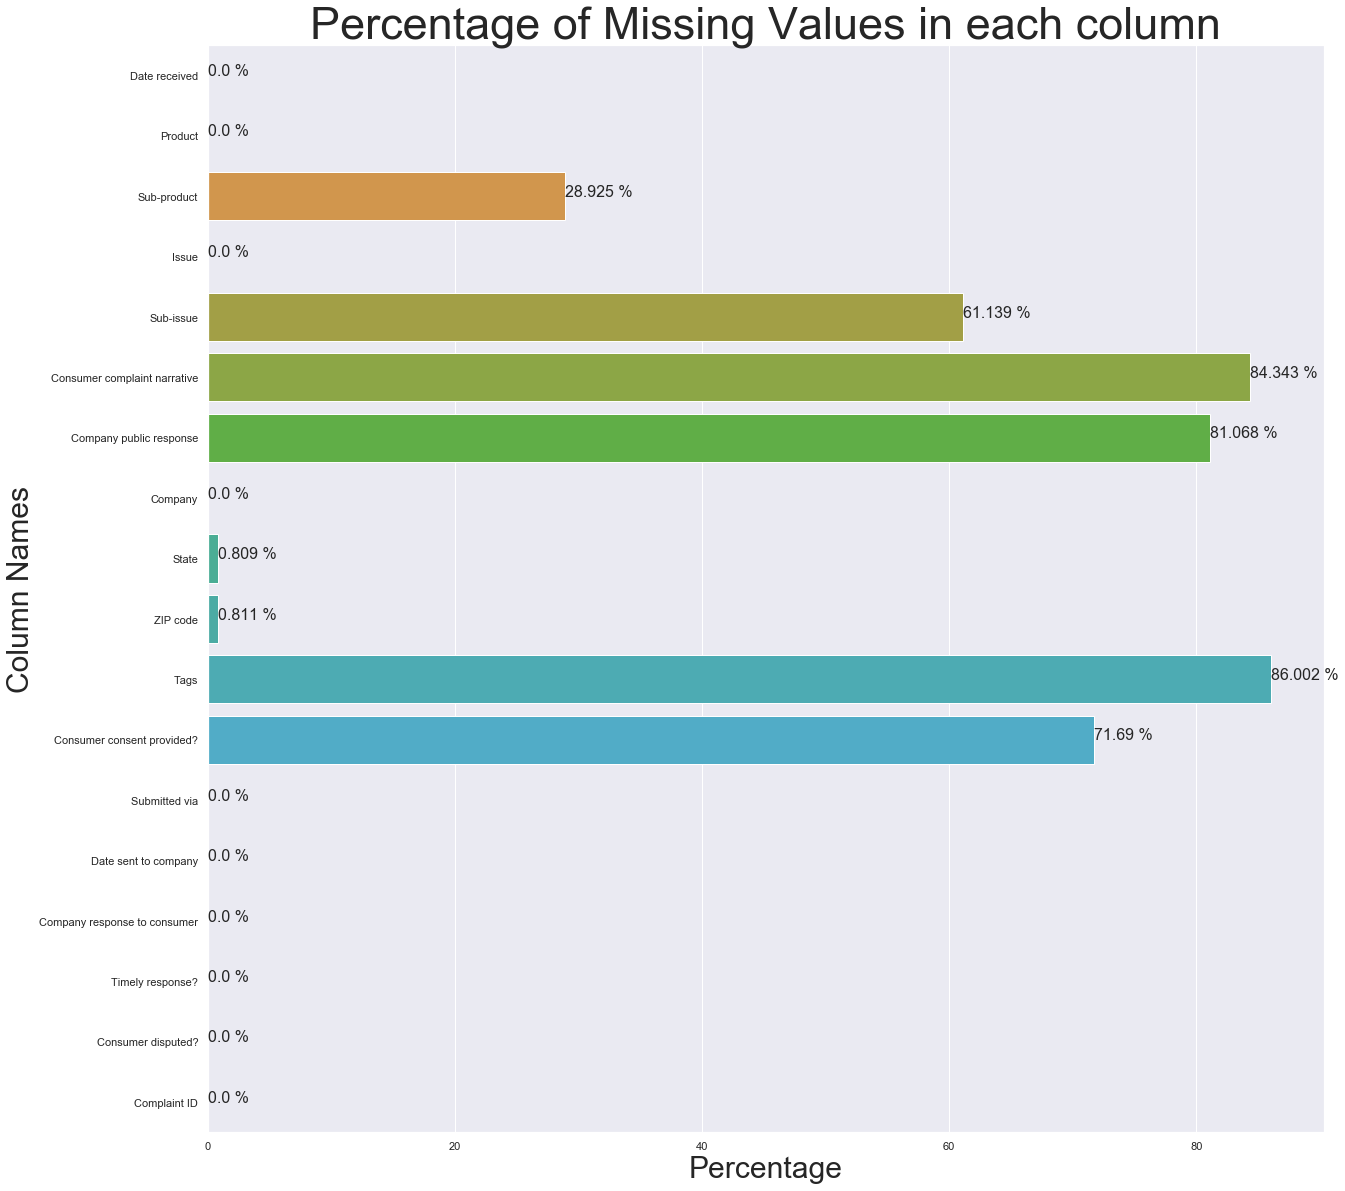

In [8]:
plt.figure(figsize=(20,20))
sns.barplot(x=df_null['Percentage Missing'],y=rawTrain_df.columns)
plt.xlabel('Percentage',size=30)
plt.ylabel('Column Names',size=30)
plt.title("Percentage of Missing Values in each column",size=45)

for index, value in enumerate(list(df_null['Percentage Missing'])):
    plt.text(value, index, str(round(value,3))+' %',fontsize=16)


<div style="background-color:##C3BEBD">
  <ul><li><h4>Inference: Important columns, 'Date Recieved', 'Product', 'Issue', 'Timely Response' and 'Consumer Disputed' do not have any empty records in them and Hence, are benifical to provide accurate Analysis in further EDA. However, 'Consumer Cmplaint Narrative' has 84.343 % Empty records. It means we have lesser data to figure out if Consumer Disputed or not</h4></li></ul>
</div>

<div style="background-color:##66ff99">
  <ul><li><h3>Analyzing Categoricals Column and their categories</h3></li></ul>
</div>

In [9]:
# Get main Categorical Columns
df_categorical = rawTrain_df[['Product','Issue','Company','State','Consumer consent provided?','Submitted via',\
                              'Company response to consumer','Timely response?','Consumer disputed?']]

<div style="background-color:#ffff00">
  <ul><li><h4>Product Categories</h4></li></ul>
</div>

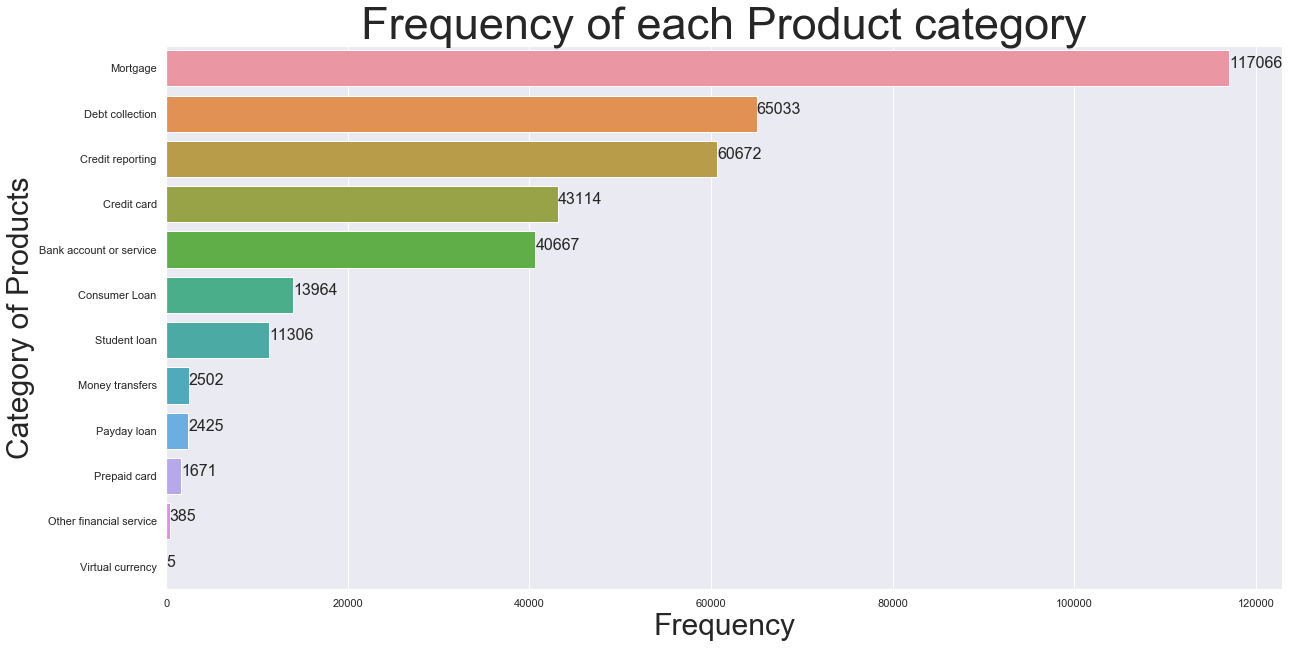

In [10]:
df_Product = pd.DataFrame(df_categorical['Product'].value_counts()).reset_index()
df_Product.columns = ['Products','Counts']

products = df_Product['Products']
product_counts = df_Product['Counts']

sns.barplot(x=product_counts,y=products)
plt.xlabel('Frequency',size=30)
plt.ylabel('Category of Products',size=30)
plt.title("Frequency of each Product category",size=45)

for index, value in enumerate(list(product_counts)):
    plt.text(value, index, str(value),fontsize=16)


<div style="background-color:##C3BEBD">
  <ul><li><h4>Inference: Most of the Compliants recieved were related to Mortgage, Debt Collection, Credit Card and Bank Accounts  </h4></li></ul>
</div>

<div style="background-color:#ffff00">
  <ul><li><h4>Issue Categories</h4></li></ul>
</div>

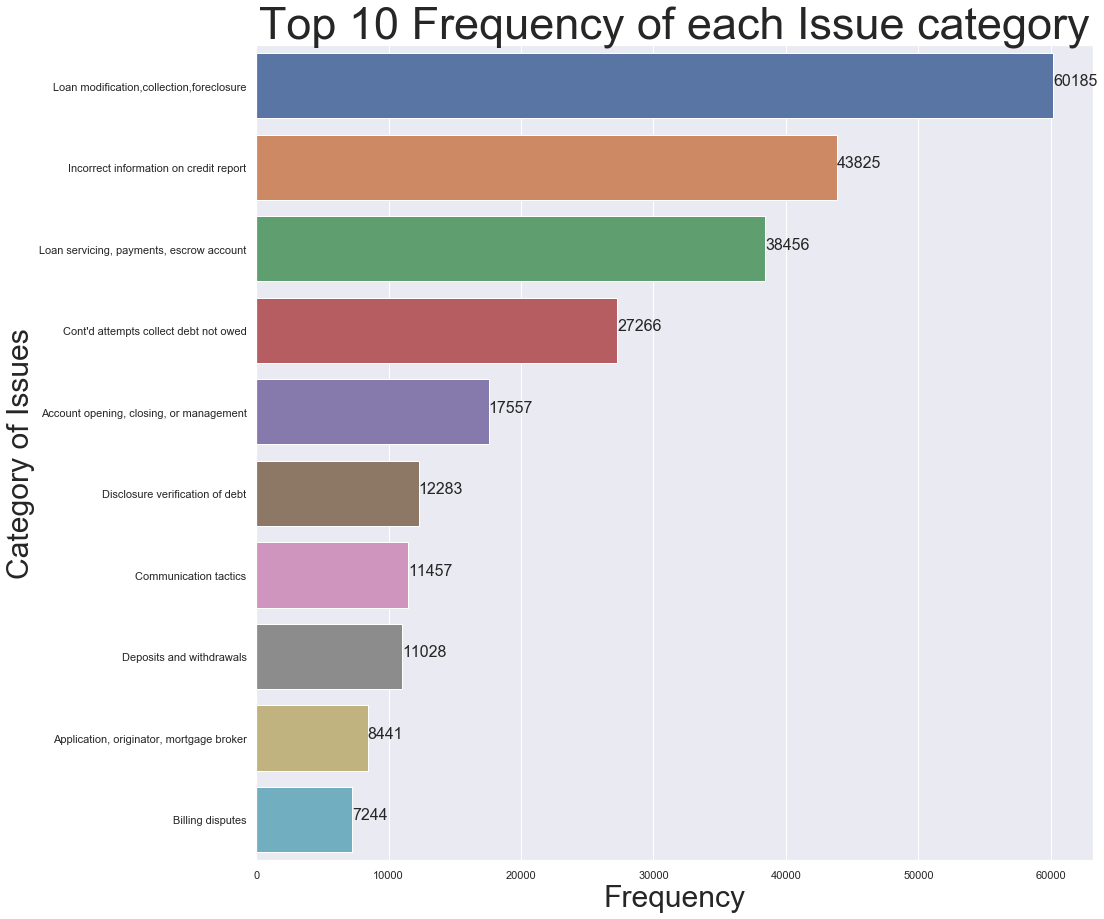

In [11]:
df_Issues = pd.DataFrame(df_categorical['Issue'].value_counts()).reset_index()
df_Issues.columns = ['Issues','Counts']

Issues = df_Issues['Issues'][:10]
Issue_counts = df_Issues['Counts'][:10]

plt.figure(figsize=(15,15))
sns.barplot(x=Issue_counts,y=Issues)
plt.xlabel('Frequency',size=30)
plt.ylabel('Category of Issues',size=30)
plt.title("Top 10 Frequency of each Issue category",size=45)

for index, value in enumerate(list(Issue_counts)):
    plt.text(value, index, str(value),fontsize=16)


<div style="background-color:##C3BEBD">
  <ul><li><h4>Inference: Issues related to 'Loan Modification, collection, closure', 'Incorrect information on Credit Report', 'Loan Servicing, Pyaments, Escrow Account' were registered the most from the Consumers' Complaints  </h4></li></ul>
</div>

<div style="background-color:#ffff00">
  <ul><li><h4>Companies</h4></li></ul>
</div>

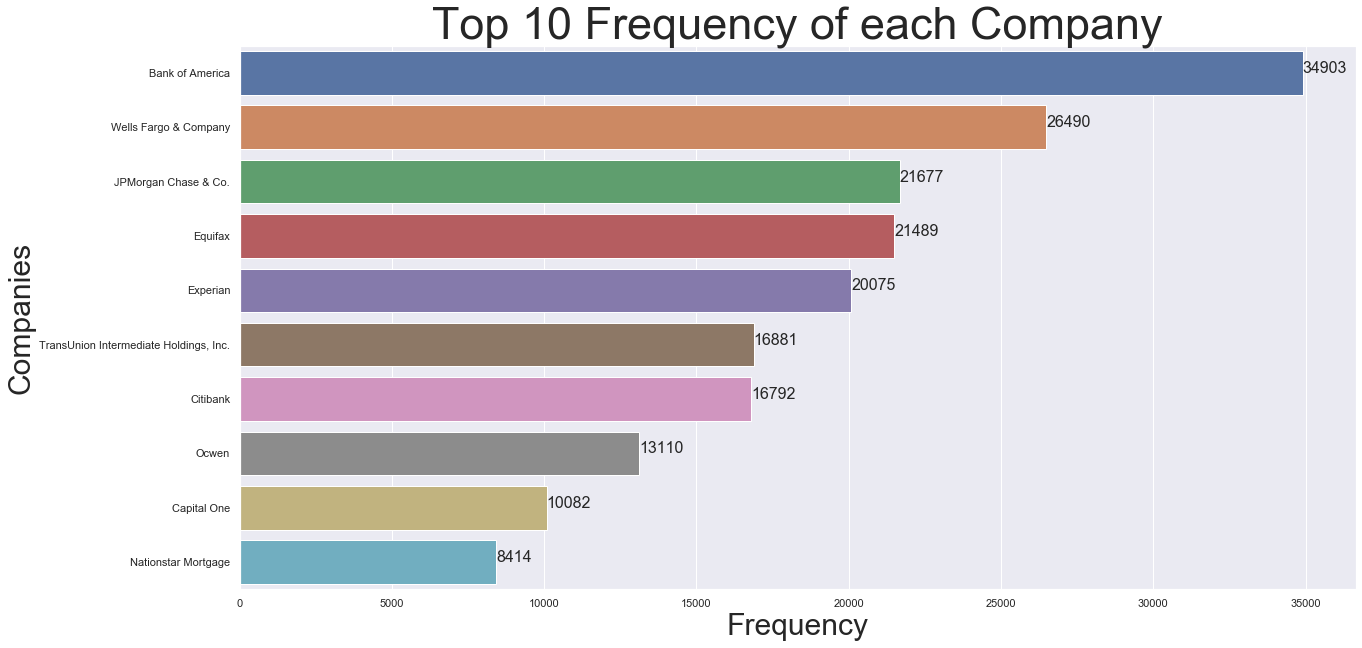

In [12]:
df_Companies = pd.DataFrame(df_categorical['Company'].value_counts()).reset_index()
df_Companies.columns = ['Company','Counts']

Companies = df_Companies['Company'][:10]
Company_counts = df_Companies['Counts'][:10]


sns.barplot(x=Company_counts,y=Companies)
plt.xlabel('Frequency',size=30)
plt.ylabel('Companies',size=30)
plt.title("Top 10 Frequency of each Company",size=45)

for index, value in enumerate(list(Company_counts)):
    plt.text(value, index, str(value),fontsize=16)


<div style="background-color:##C3BEBD">
  <ul><li><h4>Inference : Most Company that got complaints were 'Bank Of America', 'Wells Fargo', 'JP Morgan' </h4></li></ul>
</div>

<div style="background-color:#ffff00">
  <ul><li><h4>States</h4></li></ul>
</div>

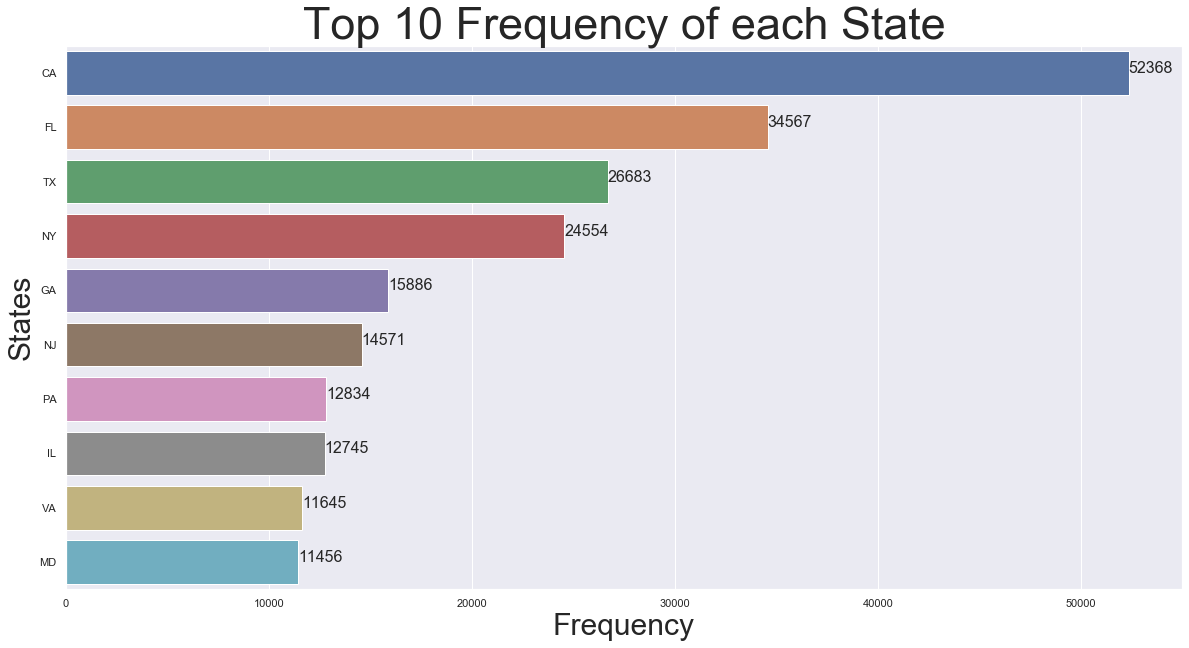

In [13]:
df_States = pd.DataFrame(df_categorical['State'].value_counts()).reset_index()
df_States.columns = ['States','Counts']

States = df_States['States'][:10]
State_counts = df_States['Counts'][:10]

sns.barplot(x=State_counts,y=States)
plt.xlabel('Frequency',size=30)
plt.ylabel('States',size=30)
plt.title("Top 10 Frequency of each State",size=45)

for index, value in enumerate(list(State_counts)):
    plt.text(value, index, str(value),fontsize=16)


<div style="background-color:##C3BEBD">
  <ul><li><h4> State Codes : CA, FL, TX had most number of complaints over 6 years </h4></li></ul>
</div>

In [14]:
states = rawTrain_df['State'].value_counts()

scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = states.index,
    z = states.values,
    locationmode = 'USA-states',
    text = states.index,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(254,254,254)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Complaints")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Complaints by State'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(100,149,237)'),
)

fig = go.Figure(data = data, layout = layout)
iplot(fig)

<div style="background-color:#ffff00">
  <ul><li><h4>Consent Provided?</h4></li></ul>
</div>

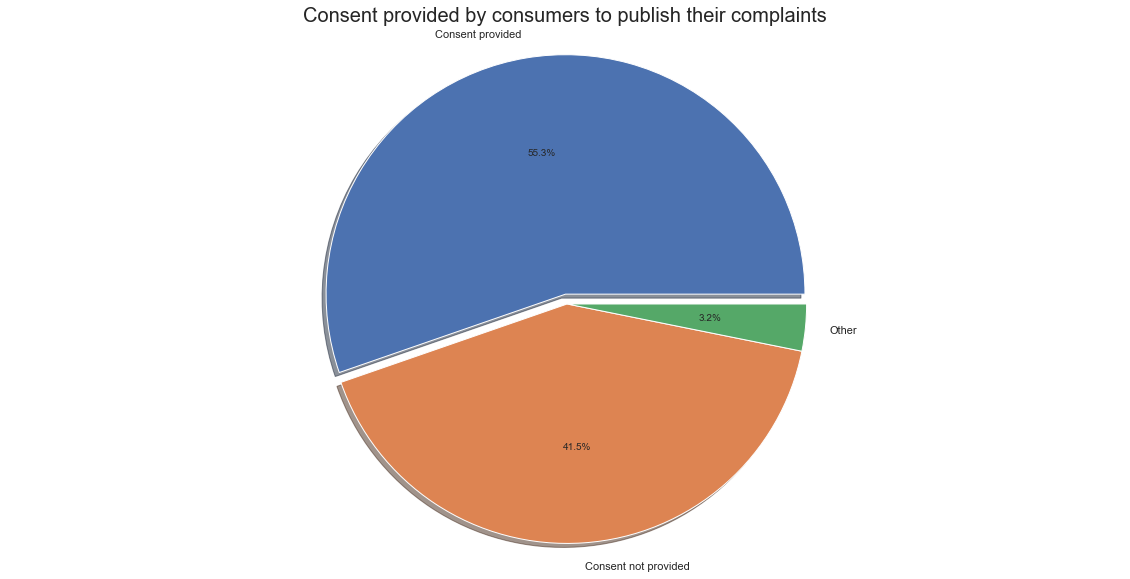

In [15]:
df_consent = pd.DataFrame(df_categorical['Consumer consent provided?'].value_counts()).reset_index()
df_consent.columns = ['Consumer Consent','Counts']

Consents = df_consent['Consumer Consent'][:3]
Consent_counts = df_consent['Counts'][:3]
explode = (0.05,0,0)
plt.pie(Consent_counts,explode=explode, labels=Consents, radius=1.2,shadow=True,autopct='%1.1f%%')    
plt.title('Consent provided by consumers to publish their complaints',size=20)
plt.axis('equal')
plt.show()


<div style="background-color:##C3BEBD">
  <ul><li><h4> Inference: 56% of the total consumers provided consent to publish their complaints while 41.5 % denied the same </h4></li></ul>
</div>

<div style="background-color:#ffff00">
  <ul><li><h4>Complaints Submitted Via</h4></li></ul>
</div>

In [16]:
df_submitted_via = pd.DataFrame(df_categorical['Submitted via'].value_counts()).reset_index()
df_submitted_via.columns = ['Submitted via','Counts']
submitted_via = df_submitted_via['Submitted via']
submissions_per_channel = df_submitted_via['Counts']

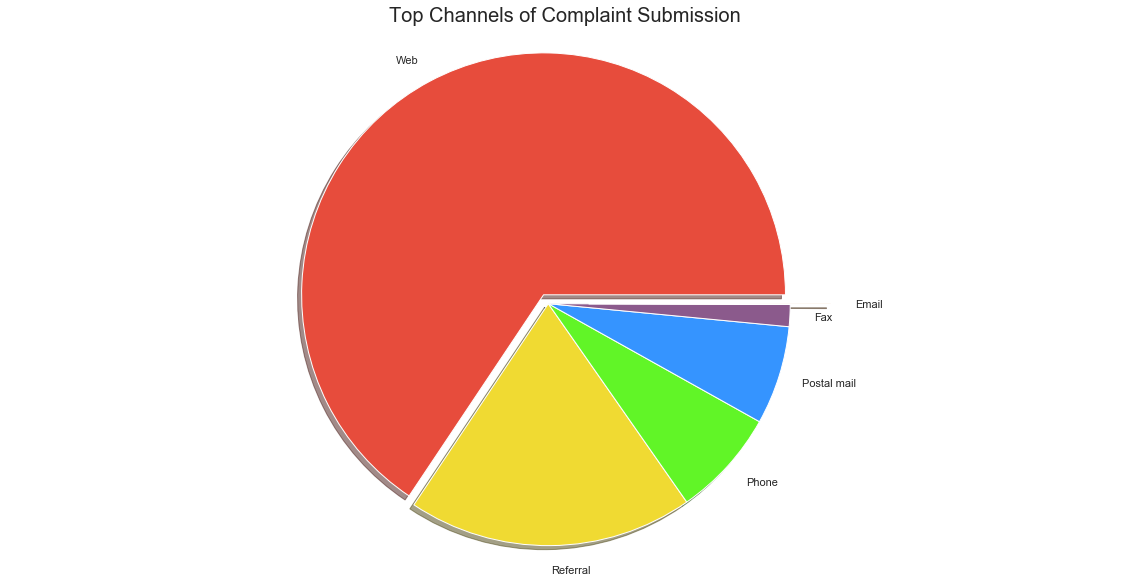

In [17]:
# Assign the colors
colors = ['#E74C3C','#F0DA32','#61F527','#3594FF','#8B5A8C','#EB984E']
explode = (0.05, 0, 0, 0, 0, 0.2)
# Plot the chart
plt.pie(submissions_per_channel, labels=submitted_via, colors=colors,explode=explode, radius=1.2,shadow=True)    
plt.title('Top Channels of Complaint Submission',size=20)
plt.axis('equal')
plt.show()


<div style="background-color:##C3BEBD">
  <ul><li><h4> Inference: 'Web' was the top medium to register the Complaint about the Companies products</h4></li></ul>
</div>

In [18]:
pd.crosstab(rawTrain_df['Timely response?'],rawTrain_df['Submitted via']).iplot(kind='bar',
                                                                                    title='Company Response to the Customer')

<div style="background-color:##C3BEBD">
  <ul><li><h4> Inference: 'Web' was the top medium to register the Complaint about the Companies products in both cases when there was Timely Response or not</h4></li></ul>
</div>

<div style="background-color:#ffff00">
  <ul><li><h4>Company's response to consumer</h4></li></ul>
</div>

In [19]:
grouped = rawTrain_df.groupby(['Company response to consumer']).size()
pie_chart = go.Pie(labels=grouped.index,values=grouped,
                  title='Company Response to the Customer')
iplot([pie_chart])


<div style="background-color:##C3BEBD">
  <ul><li><h4> Inference: Majority of Complaints were closed with explaination </h4></li></ul>
</div>

<div style="background-color:#ffff00">
  <ul><li><h4>Company's Timely-Response to consumer?</h4></li></ul>
</div>

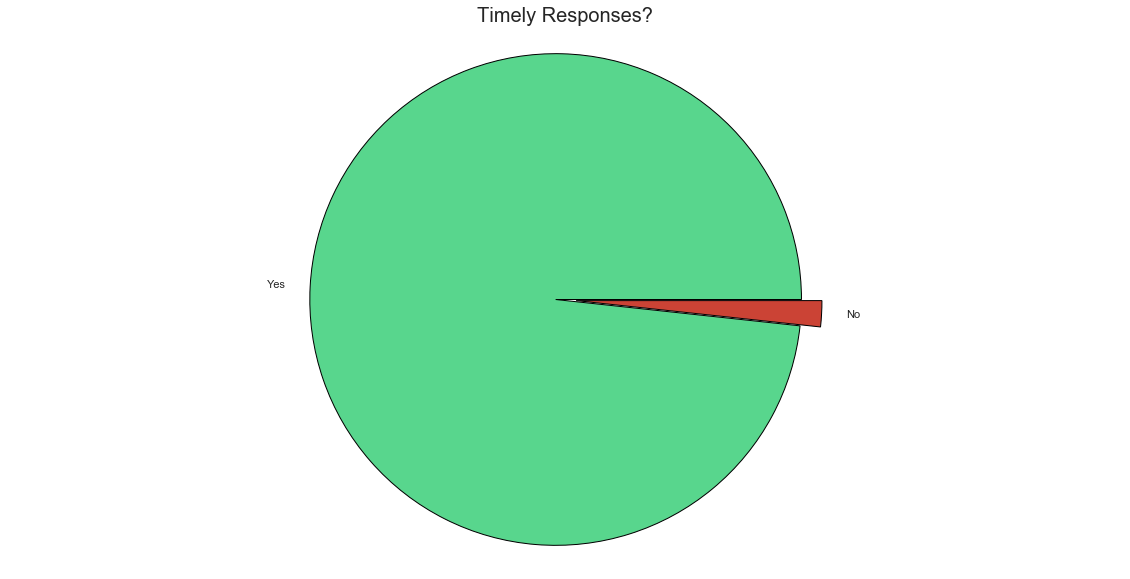

In [20]:
df_timely_response = pd.DataFrame(df_categorical['Timely response?'].value_counts()).reset_index()
df_timely_response.columns = ['Timely responses','Counts']
timely_responses = df_timely_response['Timely responses']
counts_per_response = df_timely_response['Counts']

# Assign the colors
colors = ['#58D68D','#CB4335']
explode = (0,0.1)
# Plot the chart
plt.pie(counts_per_response, labels=timely_responses, colors=colors, explode=explode,radius=1.2,wedgeprops={"edgecolor":"0",'linewidth': 1,
                    'linestyle': 'solid', 'antialiased': True})    
plt.title('Timely Responses?',size=20)
plt.axis('equal')
plt.show()


<div style="background-color:##C3BEBD">
  <ul><li><h4> Inference : Most of the Complaints had timely response </h4></li></ul>
</div>

<div style="background-color:#ffff00">
  <ul><li><h4>Customer Disputed?</h4></li></ul>
</div>

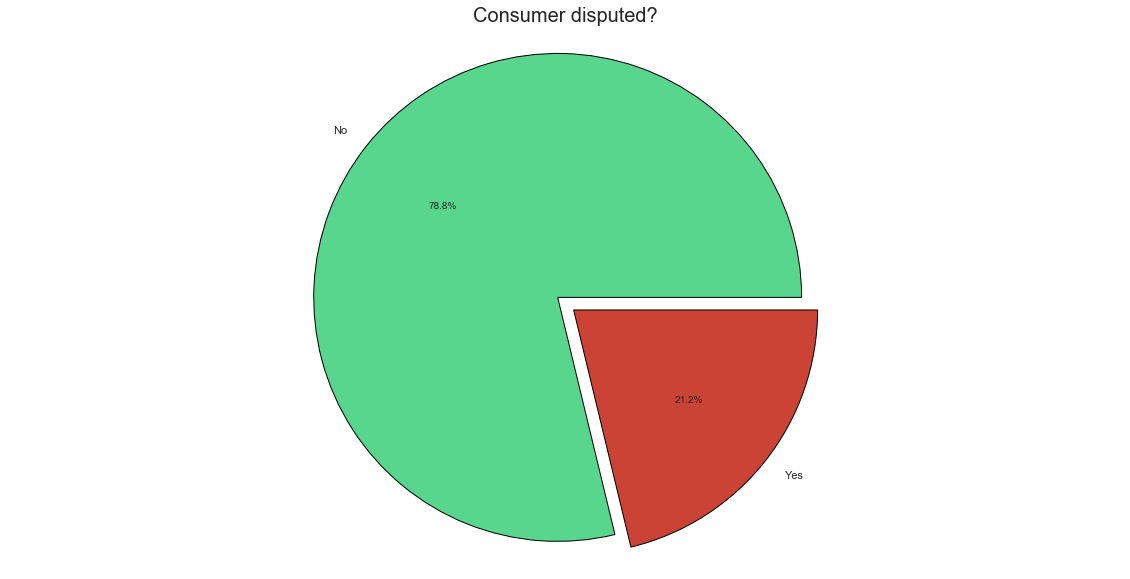

In [21]:
df_consumer_disputed = pd.DataFrame(df_categorical['Consumer disputed?'].value_counts()).reset_index()
df_consumer_disputed.columns = ['Disputes','Counts']
disputes = df_consumer_disputed['Disputes']
counts_per_dispute = df_consumer_disputed['Counts']

# Assign the colors
colors = ['#58D68D','#CB4335']
explode = (0,0.1)
# Plot the chart
plt.pie(counts_per_dispute, labels=disputes, colors=colors, explode=explode,radius=1.2,wedgeprops={"edgecolor":"0",'linewidth': 1,
                    'linestyle': 'solid', 'antialiased': True},autopct='%1.1f%%')    
plt.title('Consumer disputed?',size=20)
plt.axis('equal')
plt.show()


<div style="background-color:##C3BEBD">
  <ul><li><h4> Inference: Even though Majority of Consumers did not dispute the Resolutions, However, still there are Significant amount (~20%) who disputed the Resolution. It means that data given is unbalanced data set, which can be challenging to predict such future disputes</h4></li></ul>
</div>

In [22]:
pd.crosstab(rawTrain_df['Timely response?'], rawTrain_df['Consumer disputed?']).iplot(kind='bar',
                                                                    title ='Timely Response vs Consumer Disputed' )

<div style="background-color:##C3BEBD">
  <ul><li><h4> Inference:Number of Consumers disputed in both cases were high when there was Timely Response or not</h4></li></ul>
</div>

<div style="background-color:##66ff99">
  <ul><li><h3>Analyzing Top Issues and Sub-Issues Raised</h3></li></ul>
</div>

In [23]:
issue_df = pd.DataFrame(rawTrain_df['Issue'].value_counts()/rawTrain_df['Issue'].value_counts().sum()*100).reset_index()
issue_df.columns = ['Issues','Percentage Share for each Issue']
issue_df.sort_values(by='Percentage Share for each Issue',ascending=False,inplace=True)

Text(0.5, 1.0, 'Top 10 Issues in 6 Years')

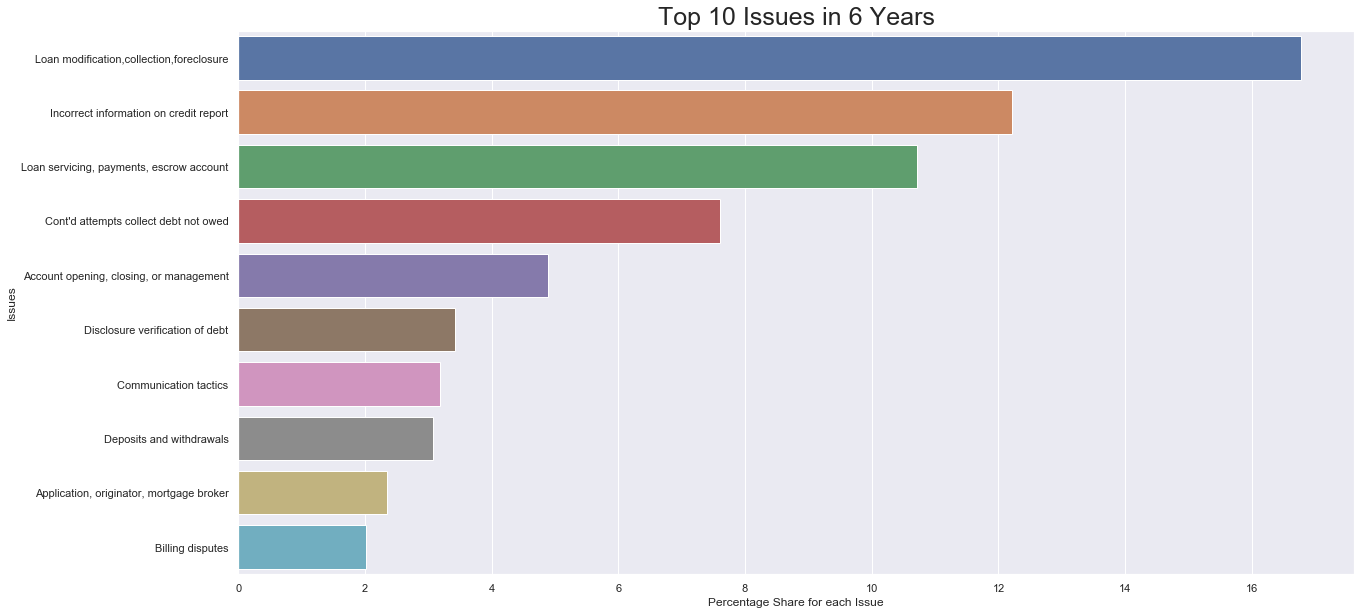

In [24]:
sns.barplot(x=issue_df.head(10)['Percentage Share for each Issue'],y=issue_df.head(10)['Issues'])
plt.title('Top 10 Issues in 6 Years',size=25)

In [25]:
subissue_df = pd.DataFrame(rawTrain_df['Sub-issue'].value_counts()/rawTrain_df['Sub-issue'].value_counts().sum()*100).reset_index()
subissue_df.columns = ['Sub-Issues','Percentage Share for each Sub-Issue']
subissue_df.sort_values(by='Percentage Share for each Sub-Issue',ascending=False,inplace=True)

Text(0.5, 1.0, 'Top 10 Sub-Issues in 6 Years')

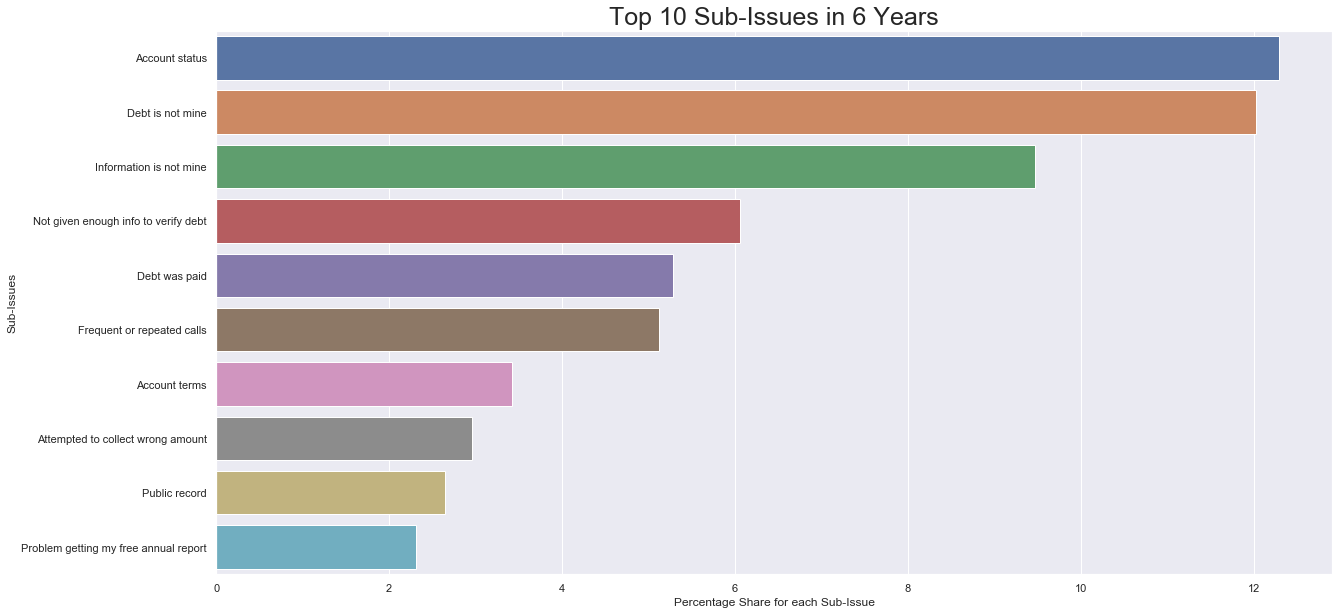

In [26]:
sns.barplot(x=subissue_df.head(10)['Percentage Share for each Sub-Issue'],y=subissue_df.head(10)['Sub-Issues'])
plt.title('Top 10 Sub-Issues in 6 Years',size=25)

<div style="background-color:##66ff99">
  <ul><li><h3>Analyzing Complaints based on Products</h3></li></ul>
</div>

In [27]:
df_comp_prod = pd.DataFrame(rawTrain_df['Product'].value_counts(ascending=True)).reset_index()
df_comp_prod.columns = ['Products','Complaints']
df_comp_prod.sort_values(by='Complaints',inplace=True,ascending=False)


value = (df_comp_prod['Complaints'] / df_comp_prod['Complaints'].sum()) * 100
y = df_comp_prod.Products

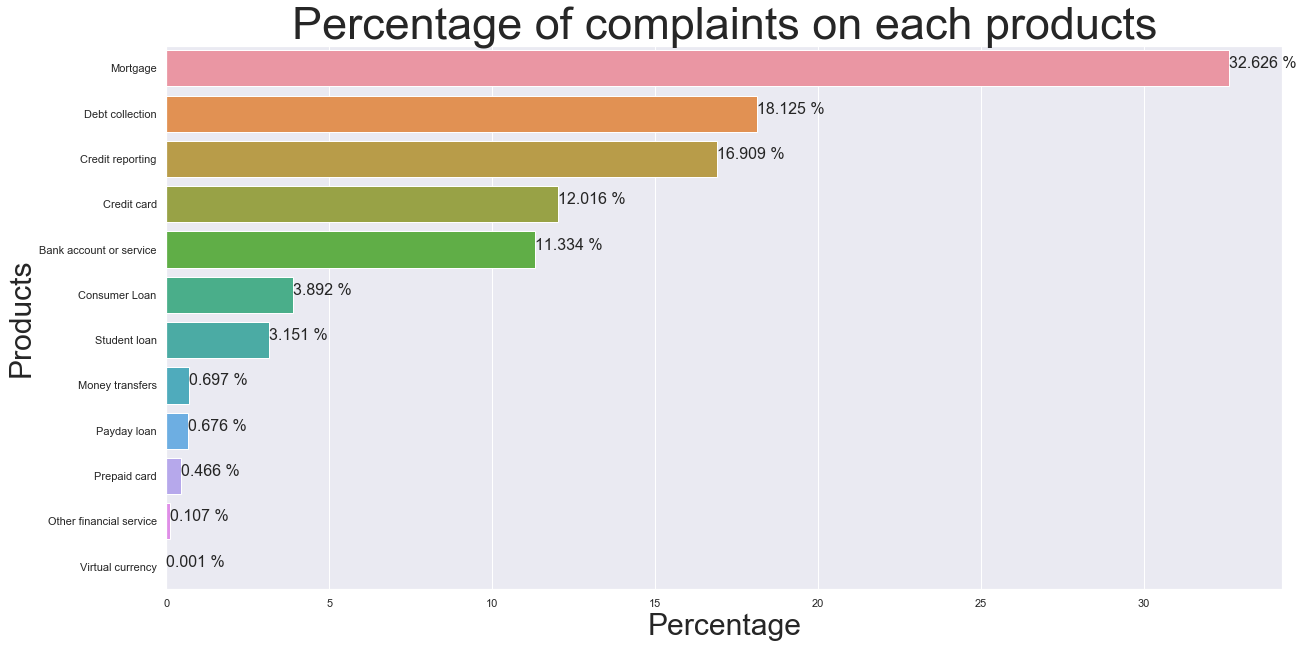

In [28]:
sns.barplot(x=value,y=y)
plt.xlabel('Percentage',size=30)
plt.ylabel('Products',size=30)
plt.title("Percentage of complaints on each products",size=45)

for index, value in enumerate(list(value)):
    plt.text(value, index, str(round(value,3))+' %',fontsize=16)

<div style="background-color:##C3BEBD">
  <ul><li><h4>Inference: Most of the Compliants recieved were related to Mortgage, Debt Collection, Credit Card and Bank Accounts  </h4></li></ul>
</div>

<div style="background-color:##66ff99">
  <ul><li><h3>Top 10 companies receiving complaints</h3></li></ul>
</div>

Text(0.5, 1.0, 'Top 10 Companies with most number of complaints in 2011')

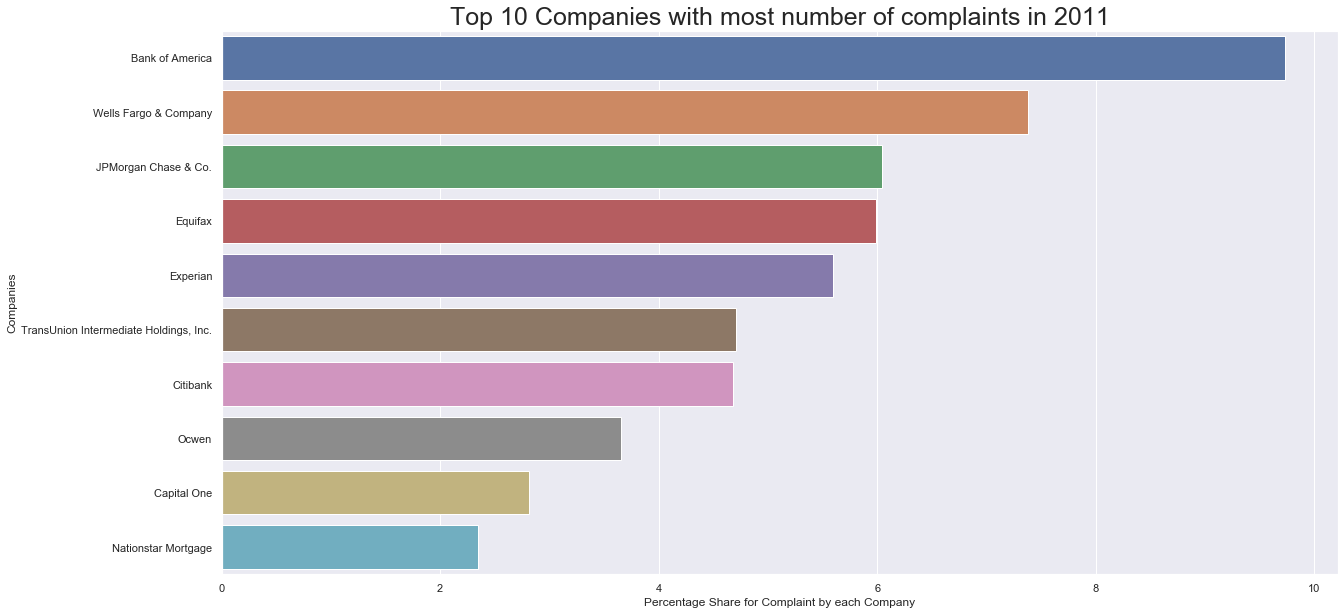

In [29]:
df_company_complaints = pd.DataFrame((rawTrain_df['Company'].value_counts()/rawTrain_df['Company'].value_counts().sum()*100).reset_index())
df_company_complaints.columns = ['Companies','Percentage Share for Complaint by each Company']
df_company_complaints.sort_values(by='Percentage Share for Complaint by each Company',ascending=False,inplace=True)


sns.barplot(x=df_company_complaints.head(10)['Percentage Share for Complaint by each Company'],y=df_company_complaints.head(10)['Companies'])
plt.title('Top 10 Companies with most number of complaints in 2011',size=25)

<div style="background-color:##66ff99">
  <ul><li><h3>Analysing Year-wise Complaints Recieved</h3></li></ul>
</div>

In [30]:
rawTrain_df['Date received'] = pd.to_datetime(rawTrain_df['Date received'],format='%Y-%m-%d')

df_from_2011 = rawTrain_df[rawTrain_df['Date received']>='2011-1-1']
df_2011 = df_from_2011[df_from_2011['Date received']<='2011-12-31']

df_from_2012 = rawTrain_df[rawTrain_df['Date received']>='2012-1-1']
df_2012 = df_from_2012[df_from_2012['Date received']<='2012-12-31']

df_from_2013 = rawTrain_df[rawTrain_df['Date received']>='2013-1-1']
df_2013 = df_from_2013[df_from_2013['Date received']<='2013-12-31']

df_from_2014 = rawTrain_df[rawTrain_df['Date received']>='2014-1-1']
df_2014 = df_from_2014[df_from_2014['Date received']<='2014-12-31']

df_from_2015 = rawTrain_df[rawTrain_df['Date received']>='2015-1-1']
df_2015 = df_from_2015[df_from_2015['Date received']<='2015-12-31']

df_from_2016 = rawTrain_df[rawTrain_df['Date received']>='2016-1-1']
df_2016 = df_from_2016[df_from_2016['Date received']<='2016-12-31']

Text(0.5, 1.0, 'Complaints recieved each Year')

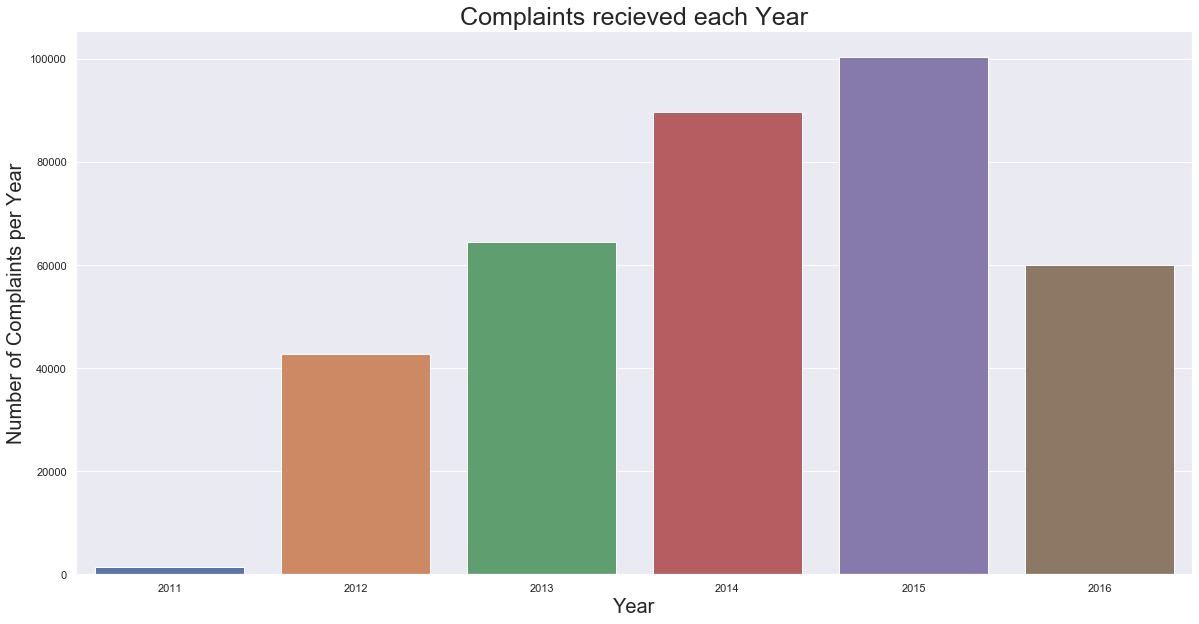

In [31]:
year_wise_complaints = [len(df_2011),len(df_2012),len(df_2013),len(df_2014),len(df_2015),len(df_2016)]
year = ['2011','2012','2013','2014','2015','2016']
sns.barplot(year,year_wise_complaints)
plt.xlabel('Year',size=20)
plt.ylabel('Number of Complaints per Year',size=20)
plt.title('Complaints recieved each Year',size=25)

<div style="background-color:##C3BEBD">
  <ul><li><h4>Inference: We can easily infer that Complaints are increasing with upcoming next year, which may be a Bad sign for the Companies. However, as all data is not present for 2011 and 2016, it can't be infered from certainity about the number of complaints in those years as a whole but the trend shows that complaints are increasing each year between 2011 and 2016, which may be alarming</h4></li></ul>
</div>

<div style="background-color:##66ff99">
  <ul><li><h3>Analysing Month-wise Complaints Recieved</h3></li></ul>
</div>

In [32]:
rawTrain_df['Date'] =pd.to_datetime(rawTrain_df['Date received'])

#Extracting Year.
rawTrain_df['Year'] =rawTrain_df['Date'].dt.year

#Extracting Month.
rawTrain_df['Month'] =rawTrain_df['Date'].dt.month_name()

#Extracting Weekdays

rawTrain_df['Week_Days'] = rawTrain_df['Date'].dt.day_name()

In [33]:
pd.crosstab(rawTrain_df['Year'],rawTrain_df['Month']).iplot(kind='bar',barmode='stack',
                                                        title='Number of Complaints per Month')

<div style="background-color:##66ff99">
  <ul><li><h3>Analysing Weekday-wise Complaints Recieved</h3></li></ul>
</div>

In [34]:
rawTrain_df['Week_Days'].value_counts().iplot(kind ='barh',title ='Number of Complaints per Weekday')

<div style="background-color:##ff99ff">
  <ul><li><h1>PART-2 [Text Based Modeling]</h1></li></ul>
</div>

In [35]:
complaint_narrative_train = rawTrain_df['Consumer complaint narrative']
complaint_narrative_test = rawTest_df['Consumer complaint narrative']

In [36]:
# Replacing the missing complaint narrative values with 'narrative missing'
complaint_narrative_train = complaint_narrative_train.fillna(value='narrative missing')
complaint_narrative_test = complaint_narrative_test.fillna(value='narrative missing')

<div style="background-color:##66ff99">
  <ul><li><h3>Cleaning Complaint Narrative text</h3></li></ul>
</div>

In [37]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create wordnet_lemmatizer of WordNetLemmatizer
    wordnet_lemmatizer = WordNetLemmatizer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in tqdm(doc_set):
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [wordnet_lemmatizer.lemmatize(i,'v') for i in stopped_tokens]
        # add tokens to list
        
        # clean the token containing xx or xxxx
        stemmed_tokens = list(filter(('xx').__ne__, stemmed_tokens))
        stemmed_tokens = list(filter(('xxxx').__ne__, stemmed_tokens))
        stemmed_tokens = list(filter(('XX').__ne__, stemmed_tokens))
        stemmed_tokens = list(filter(('XXXX').__ne__, stemmed_tokens))
        
        # token of one word has no use, hence, clean them and also removing the token which are digits
        stemmed_tokens = [token for token in stemmed_tokens if len(token)!=1]
        stemmed_tokens = [item for item in stemmed_tokens if not item.isdigit()]

        texts.append(stemmed_tokens)
      
    
    return texts

In [38]:
clean_complaint_narrative_train = preprocess_data(complaint_narrative_train)

100%|███████████████████████████████████████████████████████████████████████| 358810/358810 [00:26<00:00, 13422.04it/s]


In [39]:
clean_complaint_narrative_test = preprocess_data(complaint_narrative_test)

100%|███████████████████████████████████████████████████████████████████████| 119606/119606 [00:08<00:00, 13908.74it/s]


In [40]:
cleanComplaintNarrative_train = [' '.join(narrative) for narrative in clean_complaint_narrative_train]
cleanComplaintNarrative_test = [' '.join(narrative) for narrative in clean_complaint_narrative_test]

In [41]:
vectorizer = TfidfVectorizer(analyzer='word',max_features=500)

In [42]:
narrative_vectors_train = vectorizer.fit_transform(cleanComplaintNarrative_train)
narrative_vectors_test = vectorizer.transform(cleanComplaintNarrative_test)

In [43]:
narrative_vectors_train = narrative_vectors_train.toarray()
narrative_vectors_test = narrative_vectors_test.toarray()

In [44]:
print("The shape of vectors of train narrative data: {}".format(narrative_vectors_train.shape))
print("The shape of vectors of test narrative data: {}".format(narrative_vectors_test.shape))

The shape of vectors of train narrative data: (358810, 500)
The shape of vectors of test narrative data: (119606, 500)


<div style="background-color:##ff99ff">
  <ul><li><h1>PART-3 [FEATURE ENGINEERING AND CLASSIFICATION MODELLING]</h1></li></ul>
</div>

<div style="background-color:##66ff99">
  <ul><li><h3>Feature Engineering of Train Data</h3></li></ul>
</div>

In [45]:
rawTrain_df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID', 'Date',
       'Year', 'Month', 'Week_Days'],
      dtype='object')

In [46]:
consumer_complain_train_df = rawTrain_df.drop(['Date received','Consumer complaint narrative','Complaint ID','Sub-issue','Sub-product','State','Tags','Submitted via','Issue','Company','ZIP code','Consumer consent provided?','Date sent to company','Timely response?','Date','Year','Month','Week_Days'],axis=1)

In [47]:
consumer_complain_train_df.head() # Consumer complaint narrative will be later concatenated

,Product,Company public response,Company response to consumer,Consumer disputed?
0,Credit reporting,NaN,Closed with explanation,No
1,Bank account or service,NaN,Closed with explanation,Yes
2,Credit card,NaN,Closed with non-monetary relief,No
3,Debt collection,Company has responded to the consumer and the ...,Closed with explanation,No
4,Debt collection,NaN,Closed with explanation,Yes


In [48]:
labelencoder = LabelEncoder() # Label Encoder for 'Consumer disputed?'
onehotencoder = OneHotEncoder() # Hot Encoder for 'Product'

In [49]:
# Applying Label Encoding to 'Consumer disputed?' column
consumer_complain_train_df['Consumer disputed?']= labelencoder.fit_transform(consumer_complain_train_df['Consumer disputed?'])

# Applying One Hot Encoding to 'Product' column
enc = OneHotEncoder(handle_unknown='ignore')
product_tempData = pd.DataFrame(enc.fit_transform(consumer_complain_train_df[['Product']]).toarray())
consumer_complain_train_df = consumer_complain_train_df.join(product_tempData)

In [50]:
# Removing the 'Product' column after joining the hot-encoded values of this column
consumer_complain_train_df.drop(['Product'],axis=1,inplace=True)

In [51]:
consumer_complain_train_df.head()

,Company public response,Company response to consumer,Consumer disputed?,0,1,2,3,4,5,6,7,8,9,10,11
0,NaN,Closed with explanation,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,Closed with explanation,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,Closed with non-monetary relief,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Company has responded to the consumer and the ...,Closed with explanation,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,Closed with explanation,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# Replacing the missing values of 'Company public response' with value 'response missing'
consumer_complain_train_df['Company public response'] = consumer_complain_train_df['Company public response'].fillna(value='response missing')

In [53]:
# Mapping the value of each response to a number using the mapping dictionary
company_public_response_mapper = {
    'response missing':1,
    'Company chooses not to provide a public response':2,
    'Company has responded to the consumer and the CFPB and chooses not to provide a public response':3,
    'Company believes it acted appropriately as authorized by contract or law':4,
    'Company believes complaint caused principally by actions of third party outside the control or direction of the company':5,
    'Company believes the complaint is the result of a misunderstanding':6,
    'Company disputes the facts presented in the complaint':7,
    'Company believes complaint is the result of an isolated error':8,
    "Company can't verify or dispute the facts in the complaint":9,
    'Company believes complaint represents an opportunity for improvement to better serve consumers':10,
    'Company believes complaint relates to a discontinued policy or procedure':11
}

consumer_complain_train_df['Company public response'] = consumer_complain_train_df['Company public response'].map(company_public_response_mapper)

In [54]:
consumer_complain_train_df.head()

,Company public response,Company response to consumer,Consumer disputed?,0,1,2,3,4,5,6,7,8,9,10,11
0,1,Closed with explanation,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Closed with explanation,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,Closed with non-monetary relief,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Closed with explanation,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,Closed with explanation,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# Handling the 'Company response to consumer'
consumer_complain_train_df = pd.get_dummies(data=consumer_complain_train_df,columns=['Company response to consumer'])

In [56]:
consumer_complain_train_df.head()

,Company public response,Consumer disputed?,0,1,2,3,4,5,6,7,8,9,10,11,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief
0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
2,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0
3,3,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
4,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0


In [57]:
y_train = consumer_complain_train_df['Consumer disputed?'].values
X_train = consumer_complain_train_df.drop(['Consumer disputed?'],axis=1)

In [58]:
# Below TF-IDF vectors from complaint narrative text will be concatenated, hence converting it into array matrix like form 
narrative_vector_df = pd.DataFrame.from_records(narrative_vectors_train)

In [60]:
X_train = pd.concat([narrative_vector_df,X_train],axis=1)

In [61]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,8,9,10,11,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,0,0,0
1,0.0,0.0,0.0,0.0,0.094377,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,0,0,0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,0,0,0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,0,0,0


In [62]:
print("The shape of Training Data: {}".format(X_train.shape))

The shape of Training Data: (358810, 519)


<div style="background-color:##66ff99">
  <ul><li><h3>Feature Engineering of Test Data</h3></li></ul>
</div>

In [63]:
consumer_complain_test_df = rawTest_df[['Product','Company public response','Company response to consumer']]

In [64]:
consumer_complain_test_df.head()

,Product,Company public response,Company response to consumer
0,Credit card,NaN,Closed with monetary relief
1,Consumer Loan,Company believes it acted appropriately as aut...,Closed with explanation
2,Credit card,NaN,Closed with explanation
3,Consumer Loan,NaN,Closed with non-monetary relief
4,Debt collection,Company has responded to the consumer and the ...,Closed with explanation


In [65]:
# Applying One Hot Encoding to 'Product' column
product_tempData = pd.DataFrame(enc.transform(consumer_complain_test_df[['Product']]).toarray())
consumer_complain_test_df = consumer_complain_test_df.join(product_tempData)

In [66]:
# Removing the 'Product' column after joining the hot-encoded values of this column
consumer_complain_test_df.drop(['Product'],axis=1,inplace=True)

In [67]:
# Replacing the missing values of 'Company public response' with value 'response missing'
consumer_complain_test_df['Company public response'] = consumer_complain_test_df['Company public response'].fillna(value='response missing')

In [68]:
# Mapping the value of each response to a number using the mapping dictionary
consumer_complain_test_df['Company public response'] = consumer_complain_test_df['Company public response'].map(company_public_response_mapper)

In [69]:
# Handling the 'Company response to consumer'
consumer_complain_test_df = pd.get_dummies(data=consumer_complain_test_df,columns=['Company response to consumer'])

In [70]:
# Below TF-IDF vectors from complaint narrative text will be concatenated, hence converting it into array matrix like form 
narrative_vector_df = pd.DataFrame.from_records(narrative_vectors_test)

In [71]:
X_test = pd.concat([narrative_vector_df,consumer_complain_test_df],axis=1)

In [72]:
print("The shape of Training Data: {}".format(X_test.shape))

The shape of Training Data: (119606, 519)


<div style="background-color:##66ff99">
  <ul><li><h3>Normalization using Min-Max Scaler</h3></li></ul>
</div>

In [73]:
scaler = MinMaxScaler() # Choosing the MinMax scaler to make all the training data values in range of [0,1]

In [74]:
X_train_scaled = scaler.fit_transform(X_train) # Scaling the training data

In [75]:
X_test_scaled = scaler.fit_transform(X_test) # Scaling the test data

<div style="background-color:##66ff99">
  <ul><li><h3>Using PCA to reduce the number of feature</h3></li></ul>
</div>

In [76]:
pca = PCA(n_components=50) # Choosing 50 components from all components as features

In [77]:
X_train_pca = pca.fit_transform(X_train_scaled) # Using PCA as decomposition technique to reduce the number of features to train model

In [78]:
pca_info_dict = {'Components (or Features)':[i+1 for i in range(50)],'Explained Variance Ratio':pca.explained_variance_ratio_}
pca_df = pd.DataFrame(pca_info_dict)

In [79]:
px.bar(data_frame=pca_df,x='Components (or Features)',y='Explained Variance Ratio',title='Explained Variance Ratio [Upto 50 Components]')

In [80]:
pca = PCA(n_components=30) #From above graph, choosing the components=30 will have almost all the variablity of orginal data

In [81]:
X_train_pca = pca.fit_transform(X_train_scaled)

In [196]:
X_test_pca = pca.transform(X_test_scaled)

<div style="background-color:##66ff99">
  <ul><li><h3>Splitting the data into Train and Validation data set</h3></li></ul>
</div>

In [82]:
# Splitting the whole training dataset into training and Valiation set to evaluate the models later
X_train, X_val, y_train, y_val = train_test_split(X_train_pca, y_train, test_size=0.2, random_state=42)

<div style="background-color:##66ff99">
  <ul><li><h3>Training Classification Models along with Hyper-Parameter Tuning</h3></li></ul>
</div>

<div style="background-color:#ffff00">
  <ul><li><h4>Classification Models:</h4></li></ul>
</div>

**1. Logistic Regression**

**2. Gaussian Naive Bayes Model**

**3. Decision Trees**

**4. Random Forests**

**5. Voting Classifier**

**6. Adaboost Model**

**7. XGBoost Classifier**

**8. Gradient Boosting Classifier**

In [96]:
logisticReg_params = {
    'penalty':['l1','l2','elasticnet'],
    'C':np.linspace(start=0.001,stop=2,num=20),
    'class_weight':['balanced',{0:0.25,1:0.75},{0:0.5,1:0.5},{0:0.75,1:0.25}],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'l1_ratio':np.linspace(start=0.1,stop=1,num=10)
}

decisionTrees_params = {
    'criterion':["gini", "entropy"],
    'splitter':["best", "random"],
    'max_depth':[5,10,15,20,25,30],
    'min_samples_split':[2,3,4,5,6,7,8],
    'max_features':["auto", "sqrt", "log2"],
    'class_weight':['balanced',{0:0.25,1:0.75},{0:0.5,1:0.5},{0:0.75,1:0.25}]
}

randomForest_params = {
    'n_estimators':[50,100,150,200],
    'criterion':["gini", "entropy"],
    'max_depth':[5,10,20,30,40],
    'min_samples_split':[2,3,4,5,6,7,8],
    'max_features':["auto", "sqrt", "log2"],
    'class_weight':['balanced',{0:0.25,1:0.75},{0:0.5,1:0.5},{0:0.75,1:0.25}]
    
}

votingClassifier_params = {
    'voting':['hard', 'soft']
}

adaboost_params = {
    'n_estimators': [10,20,50,100,200]
}

xgboost_params = {
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
}

gradientBoost_params = {
    'learning_rate':[0.05, 0.01],
    'n_estimators':[100, 200],
    'max_depth' : np.linspace(1, 10, 32, endpoint=True),
    'min_samples_split' : np.linspace(0.1, 1.0, 10, endpoint=True),
    'min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True),
    'max_features' : list(range(1,X_train_pca.shape[1])),
    'criterion' : ['friedman_mse', 'mse', 'mae']
    
}

<div style="background-color:#ffff00">
  <ul><li><h4>Hyper-Parameter Tuning on Logistic Regression</h4></li></ul>
</div>

In [84]:
random_search_lgr = RandomizedSearchCV(estimator=LogisticRegression(),param_distributions=logisticReg_params,scoring='accuracy',cv=5,verbose=4,n_jobs=-1)

In [85]:
random_search_lgr.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  40 out of  50 | elapsed:   10.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   15.6s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-03, 1.06210526e-01, 2.11421053e-01, 3.16631579e-01,
       4.21842105e-01, 5.27052632e-01, 6.32263158e-01, 7.37473684e-01,
       8.42684211e-01, 9.47894737e-01, 1.05310526e+00, 1.15831579e+00,
       1.26352632e+00, 1.36873684e+00, 1.47394737e+00, 1.57915789e+00,
       1.68436842e+00, 1.78957895e+00, 1.89478947e+00, 2.00000000e+00]),
                                        'class_weight': ['balanced',
                                                         {0: 0.25, 1: 0.75},
                                                         {0: 0.5, 1: 0.5},
                                                         {0: 0.75, 1: 0.25}],
                                        'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        '

<div style="background-color:#ffff00">
  <ul><li><h4>Hyper-Parameter Tuning on Decision Trees</h4></li></ul>
</div>

In [86]:
random_search_dtc = RandomizedSearchCV(estimator=DecisionTreeClassifier(),param_distributions=decisionTrees_params,scoring='accuracy',cv=5,verbose=4,n_jobs=-1)

In [87]:
random_search_dtc.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  40 out of  50 | elapsed:    8.6s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.1s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'class_weight': ['balanced',
                                                         {0: 0.25, 1: 0.75},
                                                         {0: 0.5, 1: 0.5},
                                                         {0: 0.75, 1: 0.25}],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8],
                                        'splitter': ['best', 'random']},
                   scoring='accuracy', verbose=4)

<div style="background-color:#ffff00">
  <ul><li><h4>Hyper-Parameter Tuning on Random Forest</h4></li></ul>
</div>

In [88]:
random_search_rfc = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=randomForest_params,scoring='accuracy',cv=5,verbose=4,n_jobs=-1)

In [89]:
random_search_rfc.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  40 out of  50 | elapsed: 15.6min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 17.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'class_weight': ['balanced',
                                                         {0: 0.25, 1: 0.75},
                                                         {0: 0.5, 1: 0.5},
                                                         {0: 0.75, 1: 0.25}],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8],
                                        'n_estimators': [50, 100, 150, 200]},
                   scoring='accuracy', verbose=4)

<div style="background-color:#ffff00">
  <ul><li><h4>Hyper-Parameter Tuning on Voting Classifier</h4></li></ul>
</div>

In [90]:
gridSearch_vtc = GridSearchCV(estimator=VotingClassifier([('lr',LogisticRegression()),('rf',RandomForestClassifier()),('gnb',GaussianNB())]),param_grid=votingClassifier_params,scoring='accuracy',cv=5,verbose=4,n_jobs=-1)

In [91]:
gridSearch_vtc.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:  2.3min remaining:  9.2min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  2.3min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:  2.4min remaining:   35.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.4min finished


GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression()),
                                                    ('rf',
                                                     RandomForestClassifier()),
                                                    ('gnb', GaussianNB())]),
             n_jobs=-1, param_grid={'voting': ['hard', 'soft']},
             scoring='accuracy', verbose=4)

<div style="background-color:#ffff00">
  <ul><li><h4>Hyper-Parameter Tuning on Adaboost</h4></li></ul>
</div>

In [92]:
random_search_adb = RandomizedSearchCV(estimator=AdaBoostClassifier(),param_distributions=adaboost_params,scoring='accuracy',cv=5,verbose=4,n_jobs=-1)

In [93]:
random_search_adb.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done   9 out of  25 | elapsed:   29.5s remaining:   52.5s
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:  2.5min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:  3.9min remaining:   20.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.9min finished


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'n_estimators': [10, 20, 50, 100, 200]},
                   scoring='accuracy', verbose=4)

<div style="background-color:#ffff00">
  <ul><li><h4>Hyper-Parameter Tuning on XGBoost</h4></li></ul>
</div>

In [94]:
random_search_xgb = RandomizedSearchCV(estimator=XGBClassifier(),param_distributions=xgboost_params,scoring='accuracy',cv=5,verbose=4,n_jobs=-1)

In [95]:
random_search_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  40 out of  50 | elapsed:  6.3min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.9min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

<div style="background-color:#ffff00">
  <ul><li><h4>Gradient Boost Model</h4></li></ul>
</div>

In [97]:
gradientBoosting_model = GradientBoostingClassifier(learning_rate=0.05,n_estimators=150,max_depth=10,max_features=20)

In [98]:
gradientBoosting_model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=10, max_features=20,
                           n_estimators=150)

<div style="background-color:#ffff00">
  <ul><li><h4>Gaussian Naive Bayes Model</h4></li></ul>
</div>

In [99]:
gaussianNaiveBayes_model = GaussianNB()

In [100]:
gaussianNaiveBayes_model.fit(X_train,y_train)

GaussianNB()

<div style="background-color:##66ff99">
  <ul><li><h3>Models Evaluation</h3></li></ul>
</div>

<div style="background-color:#ffff00">
  <ul><li><h4>K Fold Cross Validation</h4></li></ul>
</div>

In [103]:
# Getting the best models achieved using Hyper-Parameter Tuning from above

best_logisticRegression_model = random_search_lgr.best_estimator_
best_decisionTree_model = random_search_dtc.best_estimator_
best_randomForest_model = random_search_rfc.best_estimator_
best_votingClassifier_model = gridSearch_vtc.best_estimator_
best_adaboost_model = random_search_adb.best_estimator_
best_XGboost_model = random_search_xgb.best_estimator_

In [108]:
# K-Fold validation on best models achieved from hyper-parameter tuning to get cross validated accuracies
logisticRegression_scores = cross_val_score(estimator=best_logisticRegression_model,
                         X=X_train,
                         y=y_train,
                         cv=3,
                         n_jobs=-1)
print('CV accuracy of Logistic Regression Model: %.3f +/- %.3f' % (np.mean(logisticRegression_scores), np.std(logisticRegression_scores)))

decisionTree_scores = cross_val_score(estimator=best_decisionTree_model,
                         X=X_train,
                         y=y_train,
                         cv=3,
                         n_jobs=-1)
print('CV accuracy of Decision Tree Model: %.3f +/- %.3f' % (np.mean(decisionTree_scores), np.std(decisionTree_scores)))
                                                             
randomForest_scores = cross_val_score(estimator=best_randomForest_model,
                         X=X_train,
                         y=y_train,
                         cv=3,
                         n_jobs=-1)
print('CV accuracy of Random Forest Model: %.3f +/- %.3f' % (np.mean(randomForest_scores), np.std(randomForest_scores)))
                                                             
votingClassifier_scores = cross_val_score(estimator=best_votingClassifier_model,
                         X=X_train,
                         y=y_train,
                         cv=3,
                         n_jobs=-1)
print('CV accuracy of Voting Classifier Model: %.3f +/- %.3f' % (np.mean(votingClassifier_scores), np.std(votingClassifier_scores)))
                                                             
adaboost_scores = cross_val_score(estimator=best_adaboost_model,
                         X=X_train,
                         y=y_train,
                         cv=3,
                         n_jobs=-1)
print('CV accuracy of AdaBoost Model: %.3f +/- %.3f' % (np.mean(adaboost_scores), np.std(adaboost_scores)))
                                                             
XGboost_scores = cross_val_score(estimator=best_XGboost_model,
                         X=X_train,
                         y=y_train,
                         cv=3,
                         n_jobs=-1,)
print('CV accuracy of XGBoost Model: %.3f +/- %.3f' % (np.mean(XGboost_scores), np.std(XGboost_scores)))
                                                       
                                                       
# K-Fold validation on Gradient Boosting and Gaussian Naive Bayes Modes to get cross validated accuracies
gradientBoosting_scores = cross_val_score(estimator=gradientBoosting_model,
                         X=X_train,
                         y=y_train,
                         cv=3,
                         n_jobs=-1)
print('CV accuracy of Gradient Boosting Model: %.3f +/- %.3f' % (np.mean(gradientBoosting_scores), np.std(gradientBoosting_scores)))
                                                       
gaussianNaiveBayes_scores = cross_val_score(estimator=gaussianNaiveBayes_model,
                         X=X_train,
                         y=y_train,
                         cv=3,
                         n_jobs=-1)
print('CV accuracy of Gaussian Naive Bayes Model: %.3f +/- %.3f' % (np.mean(gaussianNaiveBayes_scores), np.std(gaussianNaiveBayes_scores)))

CV accuracy of Logistic Regression Model: 0.788 +/- 0.000
CV accuracy of Decision Tree Model: 0.787 +/- 0.000
CV accuracy of Random Forest Model: 0.788 +/- 0.000
CV accuracy of Voting Classifier Model: 0.788 +/- 0.000
CV accuracy of AdaBoost Model: 0.788 +/- 0.000
CV accuracy of XGBoost Model: 0.788 +/- 0.000
CV accuracy of Gradient Boosting Model: 0.787 +/- 0.000
CV accuracy of Gaussian Naive Bayes Model: 0.709 +/- 0.003


In [164]:
# Testing the models on Validation Data
print('Validation Data Score of logistic Regression Model: %.3f' %(best_logisticRegression_model.score(X_val,y_val)))
print('Validation Data Score of Decision Tree Model: %.3f' %(best_decisionTree_model.score(X_val,y_val)))
print('Validation Data Score of Random Forest Model: %.3f' %(best_randomForest_model.score(X_val,y_val)))
print('Validation Data Score of Voting Classifier Model: %.3f' %(best_votingClassifier_model.score(X_val,y_val)))
print('Validation Data Score of AdaBosst Model: %.3f' %(best_adaboost_model.score(X_val,y_val)))
print('Validation Data Score of XGBoost Model: %.3f' %(best_XGboost_model.score(X_val,y_val)))
print('Validation Data Score of Gradient Boosting Model: %.3f' %(gradientBoosting_model.score(X_val,y_val)))
print('Validation Data Score of Gaussian Naive Bayes Model: %.3f' %(gaussianNaiveBayes_model.score(X_val,y_val)))

Validation Data Score of logistic Regression Model: 0.788
Validation Data Score of Decision Tree Model: 0.787
Validation Data Score of Random Forest Model: 0.788
Validation Data Score of Voting Classifier Model: 0.788
Validation Data Score of AdaBosst Model: 0.788
Validation Data Score of XGBoost Model: 0.788
Validation Data Score of Gradient Boosting Model: 0.788
Validation Data Score of Gaussian Naive Bayes Model: 0.709


<div style="background-color:##C3BEBD">
  <ul><li><h4>Inference: As Training accuracy and Testing accuracy are almost same, there is no overfitting detected on any model</h4></li></ul>
</div>

<div style="background-color:#ffff00">
  <ul><li><h4>ROC - AUC Curves</h4></li></ul>
</div>

In [182]:
# Get predicted probabilities for each model

y_pred_prob_logisticRegression = best_logisticRegression_model.predict_proba(X_val)[:,1]
y_pred_prob_decisionTrees = best_decisionTree_model.predict_proba(X_val)[:,1]
y_pred_prob_randomForest = best_randomForest_model.predict_proba(X_val)[:,1]
y_pred_votingClassier = best_votingClassifier_model.predict(X_val)
y_pred_prob_adaBoost = best_adaboost_model.predict_proba(X_val)[:,1]
y_pred_prob_xgBoost = best_XGboost_model.predict_proba(X_val)[:,1]
y_pred_prob_gradientBoost = gradientBoosting_model.predict_proba(X_val)[:,1]
y_pred_prob_gaussainNaiveBayes = gaussianNaiveBayes_model.predict_proba(X_val)[:,1]

In [183]:
fpr_logisticRegression, tpr_logisticRegression, thresholds_logisticRegression = roc_curve(y_val,y_pred_prob_logisticRegression)
fpr_decisionTrees, tpr_decisionTrees, thresholds_decisionTrees = roc_curve(y_val,y_pred_prob_decisionTrees)
fpr_randomForest, tpr_randomForest, thresholds_randomForest = roc_curve(y_val,y_pred_prob_randomForest)
fpr_votingClassier, tpr_votingClassier, thresholds_votingClassier = roc_curve(y_val,y_pred_votingClassier)
fpr_adaBoost, tpr_adaBoost, thresholds_adaBoost = roc_curve(y_val,y_pred_prob_adaBoost)
fpr_xgBoost, tpr_xgBoost, thresholds_xgBoost = roc_curve(y_val,y_pred_prob_xgBoost)
fpr_gradientBoost, tpr_gradientBoost, thresholds_gradientBoost = roc_curve(y_val,y_pred_prob_gradientBoost)
fpr_gaussainNaiveBayes, tpr_gaussainNaiveBayes, thresholds_gaussainNaiveBayes = roc_curve(y_val,y_pred_prob_gaussainNaiveBayes)

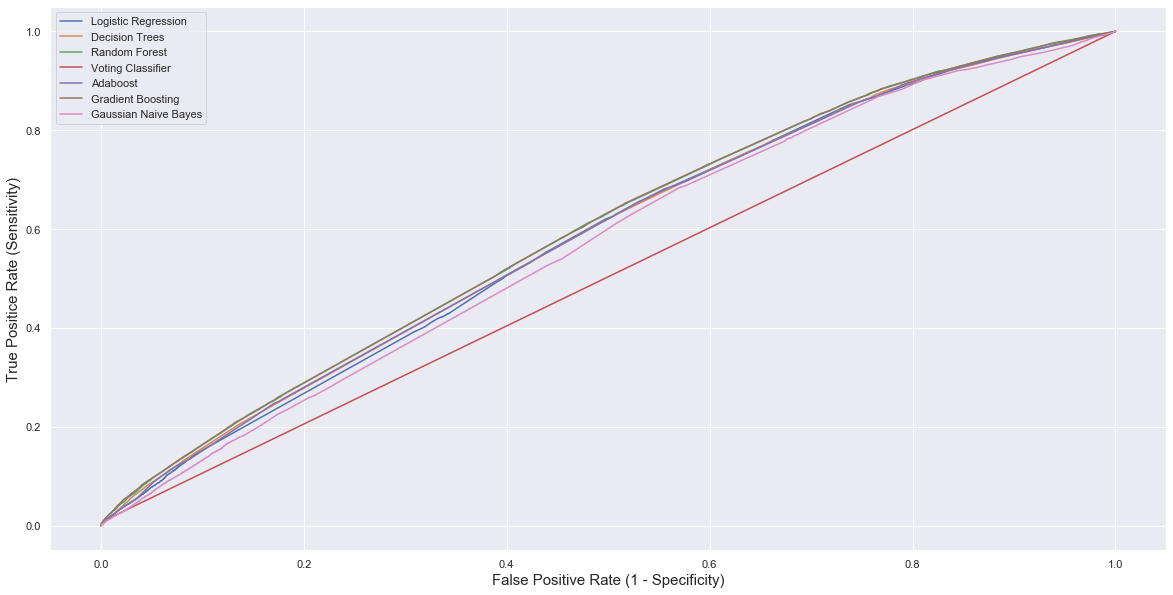

In [184]:
plt.plot(fpr_logisticRegression, tpr_logisticRegression,label='Logistic Regression')
plt.plot(fpr_decisionTrees, tpr_decisionTrees,label='Decision Trees')
plt.plot(fpr_randomForest, tpr_randomForest,label='Random Forest')
plt.plot(fpr_votingClassier, tpr_votingClassier,label='Voting Classifier')
plt.plot(fpr_adaBoost, tpr_adaBoost,label='Adaboost')
plt.plot(fpr_gradientBoost, tpr_gradientBoost,label='Gradient Boosting')
plt.plot(fpr_gaussainNaiveBayes, tpr_gaussainNaiveBayes,label='Gaussian Naive Bayes')
plt.xlabel('False Positive Rate (1 - Specificity)',size=15)
plt.ylabel('True Positice Rate (Sensitivity)',size=15)
plt.legend()

In [185]:
print('AUC of Logistic Regression is: {}'.format(roc_auc_score(y_val,y_pred_prob_logisticRegression)))
print('AUC of Decision Trees is: {}'.format(roc_auc_score(y_val,y_pred_prob_decisionTrees)))
print('AUC of Random Forest is: {}'.format(roc_auc_score(y_val,y_pred_prob_randomForest)))
print('AUC of Voting Classifier is: {}'.format(roc_auc_score(y_val,y_pred_votingClassier)))
print('AUC of Adaboost is: {}'.format(roc_auc_score(y_val,y_pred_prob_adaBoost)))
print('AUC of XGBoost is: {}'.format(roc_auc_score(y_val,y_pred_prob_xgBoost)))
print('AUC of Gradient Boosting is: {}'.format(roc_auc_score(y_val,y_pred_prob_gradientBoost)))
print('AUC of Gaussian Naive Bayes is: {}'.format(roc_auc_score(y_val,y_pred_prob_gaussainNaiveBayes)))

AUC of Logistic Regression is: 0.5823007690499534
AUC of Decision Trees is: 0.5851230360816464
AUC of Random Forest is: 0.5940030127631997
AUC of Voting Classifier is: 0.5034494512205825
AUC of Adaboost is: 0.5849422073684917
AUC of XGBoost is: 0.5926407264502307
AUC of Gradient Boosting is: 0.5943083516779892
AUC of Gaussian Naive Bayes is: 0.568963368942537


<div style="background-color:##C3BEBD">
  <ul><li><h4>Inference: Among above given models, Random Forest, XGBoost and Gradient Boost provide the highest degree of seprability. The AUC is less as expected as the data given is highly imabalanced</h4></li></ul>
</div>

<div style="background-color:#ffff00">
  <ul><li><h4>Selecting optimal Thresholds for Random Forest, XGBoost and Gradient Boost</h4></li></ul>
</div>

In [186]:
# Optimal Threshold for Random Forest
optimal_idx = np.argmax(tpr_randomForest - fpr_randomForest)
optimal_threshold_randomForest = thresholds_randomForest[optimal_idx]
print("Threshold value for Random Forest Model is:", optimal_threshold_randomForest)

Threshold value for Random Forest Model is: 0.20994515892255539


In [187]:
# Optimal Threshold for XGBoost 
optimal_idx = np.argmax(tpr_xgBoost - fpr_xgBoost)
optimal_threshold_xgboost = thresholds_xgBoost[optimal_idx]
print("Threshold value for XGBoost Model is:", optimal_threshold_xgboost)

Threshold value for XGBoost Model is: 0.21486495


In [188]:
# Optimal Threshold for Gradient Boost
optimal_idx = np.argmax(tpr_gradientBoost - fpr_gradientBoost)
optimal_threshold_gradientboost = thresholds_gradientBoost[optimal_idx]
print("Threshold value for Gradient Boosting model is:", optimal_threshold_gradientboost)

Threshold value for Gradient Boosting model is: 0.20876924937399513


<div style="background-color:#ffff00">
  <ul><li><h4>Predicting Customer Disputed or not using above thresholds</h4></li></ul>
</div>

In [189]:
y_pred_randomForest = np.where(y_pred_prob_randomForest>optimal_threshold_randomForest,1,0)

In [190]:
y_pred_xgBoost = np.where(y_pred_prob_xgBoost>optimal_threshold_xgboost,1,0)

In [191]:
y_pred_gradientBoost = np.where(y_pred_prob_gradientBoost>optimal_threshold_gradientboost,1,0)

<div style="background-color:#ffff00">
  <ul><li><h4>Confusion Matrix</h4></li></ul>
</div>

In [192]:
cf_randomForest = confusion_matrix(y_val,y_pred_randomForest)
cf_xgBoost = confusion_matrix(y_val,y_pred_xgBoost)
cf_gradientBoost = confusion_matrix(y_val,y_pred_gradientBoost)

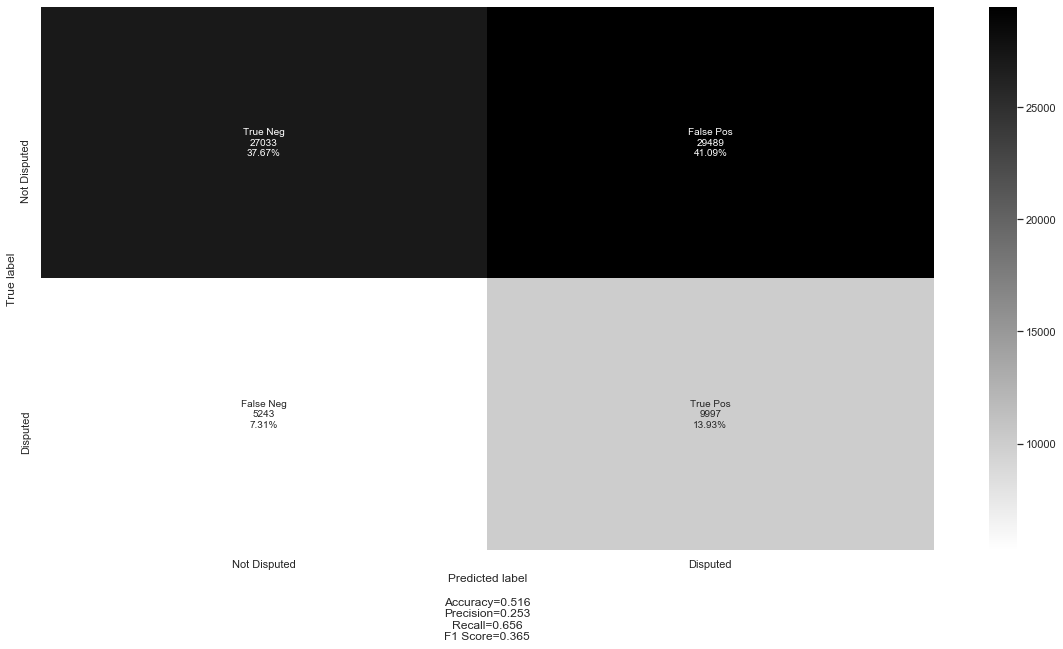

In [193]:
cf_matrix.make_confusion_matrix(cf=cf_randomForest,group_names=['True Neg','False Pos','False Neg','True Pos'],\
                               categories=['Not Disputed','Disputed'],cmap='binary')

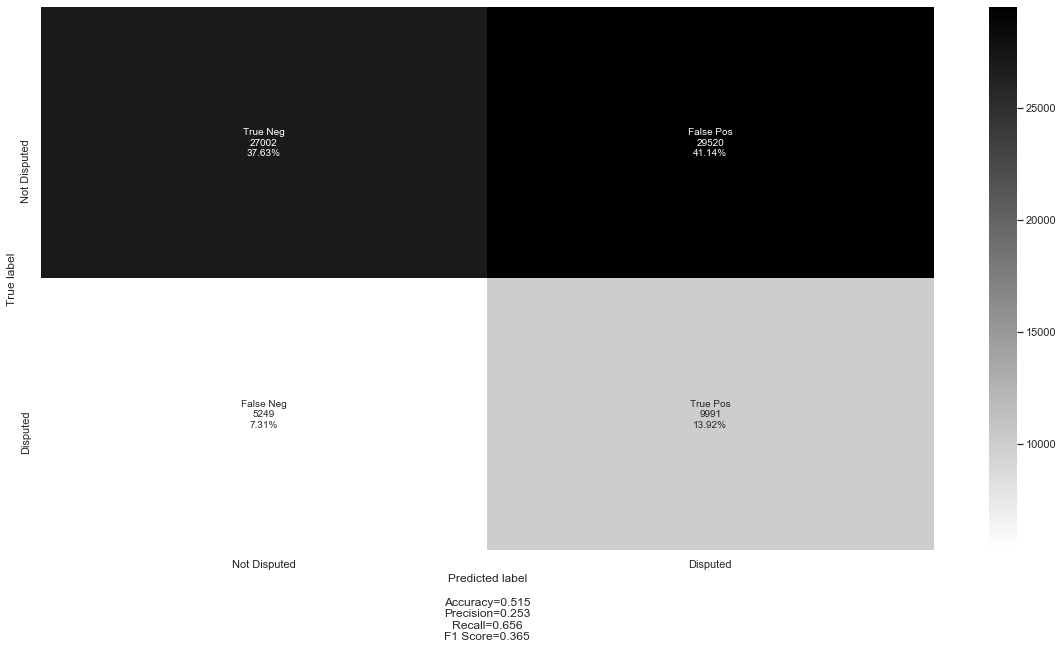

In [194]:
cf_matrix.make_confusion_matrix(cf=cf_xgBoost,group_names=['True Neg','False Pos','False Neg','True Pos'],\
                               categories=['Not Disputed','Disputed'],cmap='binary')

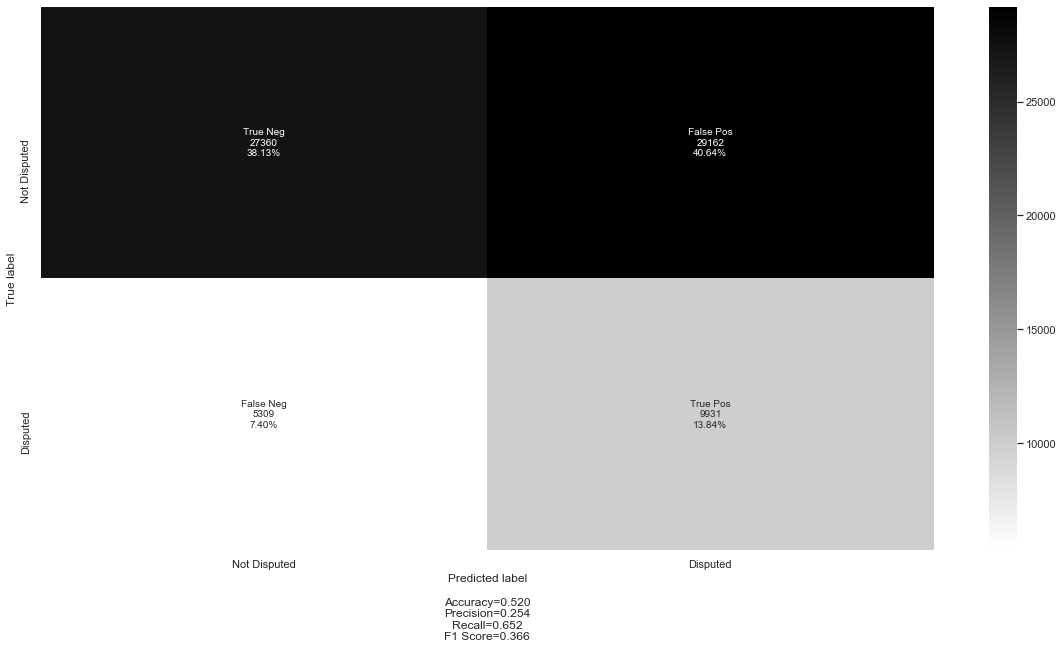

In [195]:
cf_matrix.make_confusion_matrix(cf=cf_gradientBoost,group_names=['True Neg','False Pos','False Neg','True Pos'],\
                               categories=['Not Disputed','Disputed'],cmap='binary')

<div style="background-color:##C3BEBD">
  <ul><li><h4>Inference: Accuracy of the model was sacrificed in order to maximise the separability between disputed and non-disputed cases. This way, we can keep the Recall parameter high, which may be beneficial as the model should be able to detect disputed cases more. Hence, with the cost of decreased accuracy, the models are more efficiently able to detect the disputed cases</h4></li></ul>
</div>

<div style="background-color:##ff99ff">
  <ul><li><h1>Final Prediction on Test Data</h1></li></ul>
</div>

In [219]:
y_pred_prob = best_randomForest_model.predict_proba(X_test_pca)
y_pred = np.where(y_pred_prob>optimal_threshold_randomForest,1,0).argmax(axis=1)
pd.DataFrame(y_pred).to_csv('CustomerDisputedPrediction(RandomForest).csv')

In [220]:
y_pred_prob = best_XGboost_model.predict_proba(X_test_pca)
y_pred = np.where(y_pred_prob>optimal_threshold_xgboost,1,0).argmax(axis=1)
pd.DataFrame(y_pred).to_csv('CustomerDisputedPrediction(XGBoost).csv')

In [221]:
y_pred_prob = gradientBoosting_model.predict_proba(X_test_pca)
y_pred = np.where(y_pred_prob>optimal_threshold_randomForest,1,0).argmax(axis=1)
pd.DataFrame(y_pred).to_csv('CustomerDisputedPrediction(GradientBoosting).csv')